In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from google.colab import files

In [5]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
!ls '/content/gdrive/My Drive/DataSetCidades/'


'VICTOR HORA TENORIO - cidades_do_brasil.xlsx'


In [62]:
cities = pd.read_excel('/content/gdrive/My Drive/DataSetCidades/VICTOR HORA TENORIO - cidades_do_brasil.xlsx')
cities

,Município,Estado,IBGE_1-4,IDHM,IDHM_Renda,IDHM_Educacao,GDP_CAPITA,COMP_P,Valor Vazio
0,Mojuí Dos Campos,PA,NaN,NaN,NaN,NaN,8831.56,41.0,1
1,Paraíso Das Águas,MS,NaN,NaN,NaN,NaN,92163.92,3.0,1
2,Balneário Rincão,SC,NaN,NaN,NaN,NaN,17788.63,3.0,1
3,Pescaria Brava,SC,NaN,NaN,NaN,NaN,8341.33,14.0,1
4,Santa Terezinha,BA,126.0,NaN,NaN,NaN,6796.16,12.0,1
...,...,...,...,...,...,...,...,...,...
5571,Floresta Do Piauí,PI,48.0,0.540,0.530,0.391,7638.73,1.0,0
5572,João Dias,RN,58.0,0.530,0.495,0.390,6994.26,1.0,0
5573,Araguainha,MT,55.0,0.701,0.650,0.627,19395.16,1.0,0
5574,Lagoinha Do Piauí,PI,100.0,0.597,0.561,0.488,6508.49,0.0,0


Cenário:

Um gestor público solicitou a uma consultoria um levantamento de diversas informações sobre os municípios brasileiros. O objetivo é estudar características e propor políticas adequadas nas áreas de Educação, Saúde e aumento de Renda. Para auxiliar nesse estudo, utilize a base de dados `cidades_do_brasil.xlsx`  e responda às seguintes perguntas:

Panorama Geral:

O primeiro indicador a ser analisado é o Índice de Desenvolvimento Humano Municipal (IDHM), que é composto por três dimensões: longevidade, educação e renda. O índice varia de 0 a 1, sendo que quanto mais próximo de 1, maior o desenvolvimento humano.


a) Quartil Inferior:
- Qual o valor que separa os 25% dos municípios com os menores IDHM? Utilize o conceito de quartis.

In [8]:
# Filtrar os dados para remover valores nulos na coluna IDHM e calcular o 1º quartil
cities_idhm_clean = cities.dropna(subset=['IDHM'])

# Calcular o primeiro quartil (Q1)
quartil_inferior = cities_idhm_clean['IDHM'].quantile(0.25)

quartil_inferior


0.599

b) Concentração Geográfica:
- Considerando os municípios com menor IDHM, existe uma concentração em algum estado ou distrito? Utilize o conceito de Pareto para fundamentar sua resposta.

In [9]:
low_idhm_cities = cities_idhm_clean[cities_idhm_clean['IDHM'] < quartil_inferior]
estado_counts = low_idhm_cities.groupby('Estado')['IDHM'].count().sort_values(ascending=False)
estado_counts

,IDHM
Estado,
BA,253
PI,180
MA,154
PB,150
PE,104
PA,95
AL,88
MG,71
RN,70


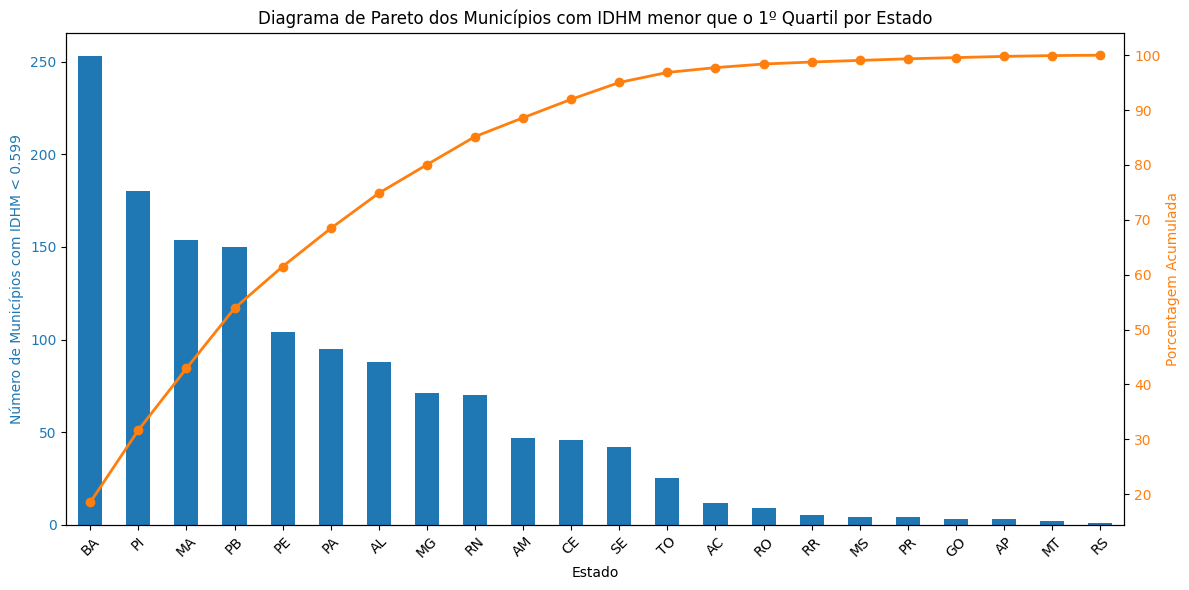

In [10]:
cumulative_percentage = estado_counts.cumsum() / estado_counts.sum() * 100

# Criar o gráfico de Pareto
fig, ax1 = plt.subplots(figsize=(12,6))

# Gráfico de barras para os estados
estado_counts.plot(kind='bar', color='C0', ax=ax1)
ax1.set_xlabel('Estado')
ax1.set_ylabel('Número de Municípios com IDHM < 0.599', color='C0')
ax1.tick_params(axis='y', labelcolor='C0')
plt.xticks(rotation=45)

# Criar o segundo eixo Y para a linha cumulativa
ax2 = ax1.twinx()
ax2.plot(cumulative_percentage, color='C1', marker='o', linestyle='-', linewidth=2)
ax2.set_ylabel('Porcentagem Acumulada', color='C1')
ax2.tick_params(axis='y', labelcolor='C1')

# Adicionar título e ajustar layout
plt.title('Diagrama de Pareto dos Municípios com IDHM menor que o 1º Quartil por Estado')
plt.tight_layout()

# Exibir o gráfico
plt.show()

c) Classificação ONU:
- A ONU classifica o IDH em quatro faixas:
  - Baixo: < 0,550
  - Médio: 0,550 - 0,699
  - Alto: 0,700 - 0,799
  - Muito Alto: >= 0,800
  - Pergunta: Com base nessa classificação, analise a situação atual do Brasil e de cada região.

O IDHM do Brasil é: 0.659
Logo, é um IDH Médio


In [26]:
# Função para categorizar o IDHM
def categorizar_idhm(idhm):
    if idhm < 0.550:
        return 'Baixo'
    elif 0.550 <= idhm < 0.700:
        return 'Médio'
    elif 0.700 <= idhm < 0.800:
        return 'Alto'
    else:
        return 'Muito Alto'

# Calcular a média do IDHM por estado
media_idhm_por_estado = cities_idhm_clean.groupby('Estado')['IDHM'].mean().reset_index()

# Adicionar a coluna de categoria com base na média do IDHM de cada estado
media_idhm_por_estado['Categoria'] = media_idhm_por_estado['IDHM'].apply(categorizar_idhm)

media_idhm_bra=cities_idhm_clean['IDHM'].mean()
print(f'O IDHM do Brasil é: {media_idhm_bra:.3f} que é um IDH Médio')
print(media_idhm_por_estado)


O IDHM do Brasil é: 0.659 que é um IDH Médio
   Estado      IDHM   Categoria
0      AC  0.586409       Médio
1      AL  0.563539       Médio
2      AM  0.565226       Médio
3      AP  0.643125       Médio
4      BA  0.594036       Médio
5      CE  0.616712       Médio
6      DF  0.820000  Muito Alto
7      ES  0.692000       Médio
8      GO  0.694992       Médio
9      MA  0.576171       Médio
10     MG  0.667875       Médio
11     MS  0.679538       Médio
12     MT  0.684071       Médio
13     PA  0.581657       Médio
14     PB  0.587771       Médio
15     PE  0.596276       Médio
16     PI  0.571196       Médio
17     PR  0.701962        Alto
18     RJ  0.708677        Alto
19     RN  0.610904       Médio
20     RO  0.644135       Médio
21     RR  0.610067       Médio
22     RS  0.713558        Alto
23     SC  0.731601        Alto
24     SE  0.597107       Médio
25     SP  0.739666        Alto
26     TO  0.639885       Médio


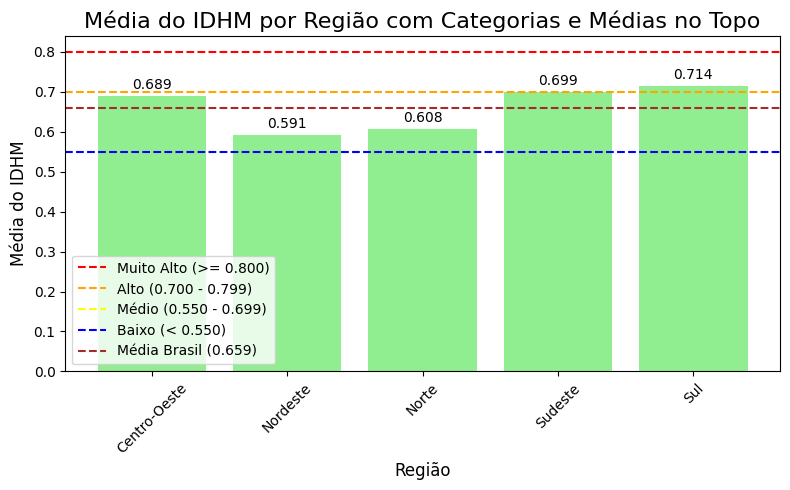

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Mapeamento dos estados para suas respectivas regiões
regioes = {
    'AC': 'Norte', 'AL': 'Nordeste', 'AM': 'Norte', 'AP': 'Norte', 'BA': 'Nordeste',
    'CE': 'Nordeste', 'DF': 'Centro-Oeste', 'ES': 'Sudeste', 'GO': 'Centro-Oeste', 'MA': 'Nordeste',
    'MT': 'Centro-Oeste', 'MS': 'Centro-Oeste', 'MG': 'Sudeste', 'PA': 'Norte', 'PB': 'Nordeste',
    'PR': 'Sul', 'PE': 'Nordeste', 'PI': 'Nordeste', 'RJ': 'Sudeste', 'RN': 'Nordeste',
    'RS': 'Sul', 'RO': 'Norte', 'RR': 'Norte', 'SC': 'Sul', 'SP': 'Sudeste',
    'SE': 'Nordeste', 'TO': 'Norte'
}

# Garantir que a operação de adição da coluna 'Região' ocorra corretamente
cities_idhm_clean.loc[:, 'Região'] = cities_idhm_clean['Estado'].map(regioes)

# Calcular a média do IDHM por região
media_idhm_por_regiao = cities_idhm_clean.groupby('Região')['IDHM'].mean().reset_index()

# Criar o gráfico de barras para a média de IDHM por região com a média no topo e linhas tracejadas
plt.figure(figsize=(8, 5))
bars = plt.bar(media_idhm_por_regiao['Região'], media_idhm_por_regiao['IDHM'], color='lightgreen')

# Adicionar as linhas tracejadas para as categorias
plt.axhline(y=0.800, color='red', linestyle='--', label='Muito Alto (>= 0.800)')
plt.axhline(y=0.700, color='orange', linestyle='--', label='Alto (0.700 - 0.799)')
plt.axhline(y=0.550, color='yellow', linestyle='--', label='Médio (0.550 - 0.699)')
plt.axhline(y=0.550, color='blue', linestyle='--', label='Baixo (< 0.550)')
plt.axhline(y=0.659, color='brown', linestyle='--', label='Média Brasil (0.659)')

# Adicionar a média no topo de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 3), ha='center', va='bottom')

# Adicionar título, rótulos e legenda
plt.title('Média do IDHM por Região com Categorias e Médias no Topo', fontsize=16)
plt.xlabel('Região', fontsize=12)
plt.ylabel('Média do IDHM', fontsize=12)

# Rotacionar os nomes das regiões
plt.xticks(rotation=45)

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.tight_layout()
plt.show()


Educação Infantil:

d) Boxplot por Região:
- Construa um boxplot da variável IDHM_Educacao por região (NO, NE, SE, S e CO). Comente as semelhanças e diferenças entre os gráficos.

<Figure size 1000x600 with 0 Axes>

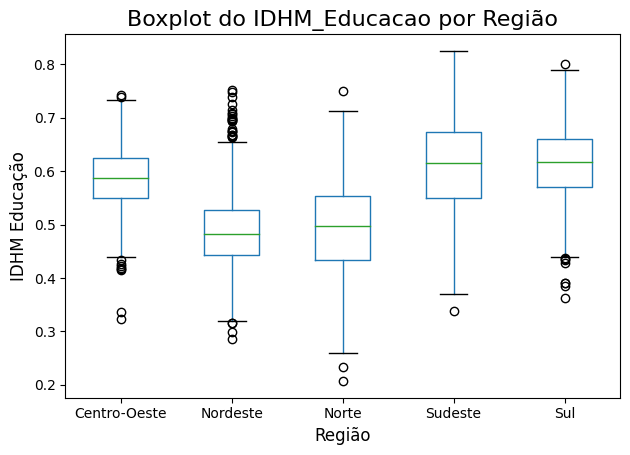

In [50]:

# Adicionar uma coluna 'Região' com base no estado
cities_idhm_clean.loc[:, 'Região'] = cities_idhm_clean['Estado'].map(regioes)

# Filtrar os dados sem valores nulos na coluna IDHM_Educacao
idhm_educacao_clean = cities_idhm_clean.dropna(subset=['IDHM_Educacao'])

# Criar o gráfico de boxplot
plt.figure(figsize=(10, 6))
idhm_educacao_clean.boxplot(column='IDHM_Educacao', by='Região', grid=False)

# Adicionar título e rótulos
plt.title('Boxplot do IDHM_Educacao por Região', fontsize=16)
plt.suptitle('')  # Remove o título padrão do Pandas
plt.xlabel('Região', fontsize=12)
plt.ylabel('IDHM Educação', fontsize=12)

# Exibir o gráfico
plt.tight_layout()
plt.show()

e) Municípios com Mais Crianças:  
- Na região com a menor média de IDHM_Educacao, identifique os municípios que estão acima do 3º quartil nacional em relação à quantidade de crianças com idade entre 1 e 4 anos (variável IBGE_1-4).

In [61]:
# Encontrar a região com a menor média de IDHM_Educacao
menor_media_idhm_educacao = idhm_educacao_clean.groupby('Região')['IDHM_Educacao'].mean().idxmin()
print(f'A região com a menor média de IDHM_Educacao é: {menor_media_idhm_educacao}')

# Calcular o 3º quartil nacional para a variável IBGE_1-4
terceiro_quartil_nacional = cities['IBGE_1-4'].quantile(0.75)
print(f'O 3º quartil nacional da variável IBGE_1-4 é: {terceiro_quartil_nacional}')

# Filtrar os dados para a região com a menor média de IDHM_Educacao
regiao_menor_media = idhm_educacao_clean[idhm_educacao_clean['Região'] == menor_media_idhm_educacao]
# Filtrar os municípios da região com a menor média de IDHM_Educacao que estão acima do 3º quartil nacional
municipios_acima_quartil = regiao_menor_media[regiao_menor_media['IBGE_1-4'] > terceiro_quartil_nacional]
municipios_acima_quartil

A região com a menor média de IDHM_Educacao é: Nordeste
O 3º quartil nacional da variável IBGE_1-4 é: 952.0


,Município,Estado,IBGE_1-4,IDHM,IDHM_Renda,IDHM_Educacao,GDP_CAPITA,COMP_P,Valor Vazio,Região
16,Recife,PE,54720.0,0.772,0.798,0.698,30477.73,1572.0,0,Nordeste
19,Salvador,BA,91470.0,0.759,0.772,0.679,20796.62,2409.0,0,Nordeste
24,Fortaleza,CE,129766.0,0.754,0.749,0.695,23045.09,2379.0,0,Nordeste
45,Barreiras,BA,8402.0,0.721,0.695,0.668,21596.35,103.0,0,Nordeste
58,Natal,RN,41558.0,0.763,0.768,0.694,24890.54,844.0,0,Nordeste
...,...,...,...,...,...,...,...,...,...,...
3709,Araçoiaba,PE,1158.0,0.590,0.544,0.498,6414.12,3.0,0,Nordeste
3810,Pirapemas,MA,970.0,0.580,0.501,0.514,6044.85,2.0,0,Nordeste
5196,Tamandaré,PE,1134.0,0.593,0.583,0.479,12134.82,18.0,0,Nordeste
5215,Irauçuba,CE,1092.0,0.605,0.526,0.557,6772.20,5.0,0,Nordeste


f) Empresas de Educação:
- Identifique os municípios que estão no 1º quartil nacional em relação à quantidade de empresas do setor educacional (variável COMP_P). Dessa forma, vamos priorizar municípios com poucas empresas de educação.

In [69]:
# prompt: Empresas de Educação:
# Identifique os municípios que estão no 1º quartil nacional em relação à quantidade de empresas do setor educacional (variável COMP_P). Dessa forma, vamos priorizar municípios com poucas empresas de educação.

# Calcular o 1º quartil nacional para a variável COMP_P
primeiro_quartil_nacional = cities['COMP_P'].quantile(0.25)
print(f'O 1º quartil nacional da variável COMP_P é: {primeiro_quartil_nacional}')
print()

# Filtrar os municípios que estão no 1º quartil nacional em relação à quantidade de empresas do setor educacional
municipios_primeiro_quartil = cities[cities['COMP_P'] <= primeiro_quartil_nacional]

# Exibir os municípios que estão no 1º quartil nacional
municipios_primeiro_quartil = municipios_primeiro_quartil[['Município', 'COMP_P', 'Estado']]
municipios_primeiro_quartil

O 1º quartil nacional da variável COMP_P é: 2.0



,Município,COMP_P,Estado
5,Pinto Bandeira,1.0,RS
640,Condeúba,0.0,BA
654,Parambu,2.0,CE
655,Cristais Paulista,2.0,SP
686,Jaborandi,1.0,SP
...,...,...,...
5571,Floresta Do Piauí,1.0,PI
5572,João Dias,1.0,RN
5573,Araguainha,1.0,MT
5574,Lagoinha Do Piauí,0.0,PI


g) Prioridade de Investimento:
- Considerando as análises anteriores, proponha uma ordem de priorização para investimento na educação dessa região.

Com base nas analises, chegamos a seguinte conclusão:
A região nordeste tem o menor IDHM_Educacao, logo deve ser o principal alvo de investimentos, principalmente os municípios que apresentam municípios com mais crianças (1 a 4 anos) e que apresentam menos empresas do setor de educação. Ou seja, dentro da região Nordeste, os municípios que estão acima do 3º quartil nacional em relação à quantidade de crianças entre 1 e 4 anos e os municípios que estão no 1º quartil nacional em relação à quantidade de empresas do setor educacional devem ser priorizados.